# Week 3

**Binary Classification Using Logical Regression**

In [ ]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load the dataset
diabetes = pd.read_csv('diabetesN.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Display count metrics for glucose column
diabetes['Glucose'].value_counts()

,count
Glucose,
99,17
100,17
111,14
125,14
129,14
...,...
56,1
169,1
149,1


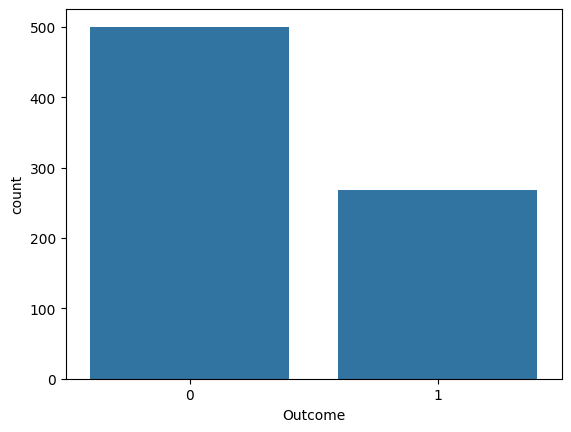

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display graph to show data balance/imbalance (imbalance in this case)
sns.countplot(x = 'Outcome', data = diabetes)
plt.show()

In [ ]:
# Show percentages for both outcomes against total
count_outcome_0 = len(diabetes[diabetes['Outcome'] == 0])
count_outcome_1 = len(diabetes[diabetes['Outcome'] == 1])
percent_outcome_0 = (count_outcome_0 / (count_outcome_0 + count_outcome_1)) * 100
percent_outcome_1 = (count_outcome_1 / (count_outcome_0 + count_outcome_1)) * 100
print(f'Percentage of no diabetics is {percent_outcome_0}%')
print(f'Percentage of diabetics is {percent_outcome_1}%')

Percentage of no diabetics is 65.10416666666666%
Percentage of diabetics is 34.89583333333333%


In [ ]:
# Display the mean for each feature with respect to outcome
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# Create x (input variables) and y (output variables)
# Important note: Axis 1 means to drop a column, 0 means to drop a row.
# Outcome from this data will be different from moodle examples as skin thickness was not included
x = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']

display(x)
display(y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
# Prepare to create model by splitting data into a training and test set (test set of 25%)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [ ]:
# Create logistical regression model and train it
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 10)

model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [ ]:
# Create prediction set
y_pred = model.predict(x_test)

# Display test value outcome count
print(y_test.value_counts())

Outcome
0    121
1     71
Name: count, dtype: int64


In [ ]:
# Create confusion matrix for test outcomes against outcome predictions
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

[[108  13]
 [ 37  34]]


Text(50.722222222222214, 0.5, 'Actual Outcomes')

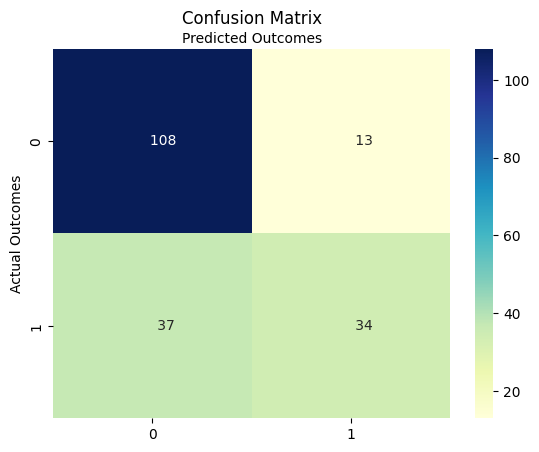

In [ ]:
# Create heatmap of confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
axis = plt.subplot()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(c_matrix), annot = True, cmap = 'YlGnBu', fmt = '8')
axis.xaxis.set_label_position('top')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')

In [ ]:
# Get the accuracy, precision, and recall metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f'Accuracy score is {accuracy_score(y_test, y_pred)}')
print(f'Precision score is {precision_score(y_test, y_pred)}')
print(f'Recall score is {recall_score(y_test, y_pred)}')

Accuracy score is 0.7395833333333334
Precision score is 0.723404255319149
Recall score is 0.4788732394366197


In [ ]:
# Display classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names = ['Without diabetes', 'With diabetes']))

                  precision    recall  f1-score   support

Without diabetes       0.74      0.89      0.81       121
   With diabetes       0.72      0.48      0.58        71

        accuracy                           0.74       192
       macro avg       0.73      0.69      0.69       192
    weighted avg       0.74      0.74      0.72       192



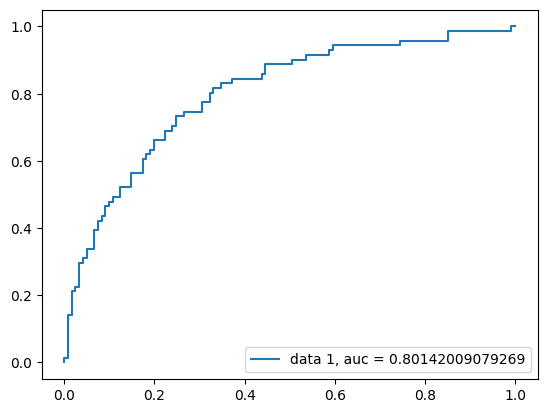

In [ ]:
# Display a ROC chart
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_log_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = f'data 1, auc = {auc}')
plt.legend(loc = 4)
plt.show()

In [ ]:
# Address the imbalance of data using over sampling and repeat metrics evaulation
from imblearn.over_sampling import SMOTE

x_new, y_new = SMOTE().fit_resample(x, y)

In [ ]:
# Show new balanced set
y_new.value_counts()

,count
Outcome,
1,500
0,500


In [ ]:
# Prepare to create model using over sampled data
from sklearn.model_selection import train_test_split

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = 10)

In [ ]:
# Create logistical regression model and train it
from sklearn.linear_model import LogisticRegression

model_new = LogisticRegression(random_state = 10)

model_new.fit(x_new_train, y_new_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [ ]:
# Create prediction set
y_new_pred = model_new.predict(x_new_test)

# Display test value outcome count, note the difference is much smaller
print(y_new_test.value_counts())

Outcome
1    130
0    120
Name: count, dtype: int64


In [ ]:
# Create confusion matrix for test outcomes against outcome predictions
from sklearn.metrics import confusion_matrix

c_matrix_new = confusion_matrix(y_new_test, y_new_pred)
print(c_matrix_new)

[[93 27]
 [35 95]]


Text(50.722222222222214, 0.5, 'Actual Outcomes')

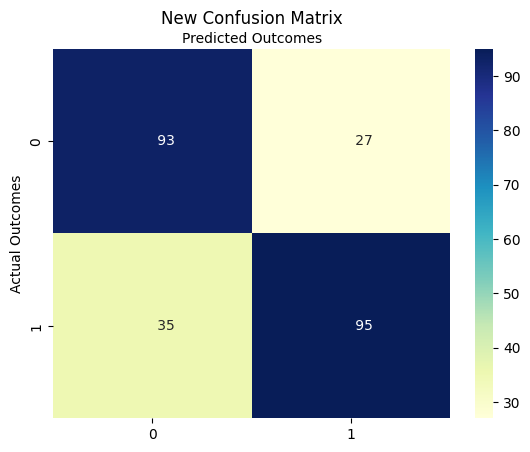

In [ ]:
# Create heatmap of confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names_new = [0, 1]
axis_new = plt.subplot()
tick_marks_new = np.arange(len(class_names_new))
plt.xticks(tick_marks_new, class_names_new)
plt.yticks(tick_marks_new, class_names_new)

sns.heatmap(pd.DataFrame(c_matrix_new), annot = True, cmap = 'YlGnBu', fmt = '8')
axis_new.xaxis.set_label_position('top')
plt.title('New Confusion Matrix')
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')

In [ ]:
# Get the accuracy, precision, and recall metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f'Accuracy score is now {accuracy_score(y_new_test, y_new_pred)}')
print(f'Precision score is now {precision_score(y_new_test, y_new_pred)}')
print(f'Recall score is now {recall_score(y_new_test, y_new_pred)}')

Accuracy score is now 0.752
Precision score is now 0.7786885245901639
Recall score is now 0.7307692307692307


In [ ]:
# Display classification report
from sklearn.metrics import classification_report

print(classification_report(y_new_test, y_new_pred, target_names = ['Without diabetes', 'With diabetes']))

                  precision    recall  f1-score   support

Without diabetes       0.73      0.78      0.75       120
   With diabetes       0.78      0.73      0.75       130

        accuracy                           0.75       250
       macro avg       0.75      0.75      0.75       250
    weighted avg       0.75      0.75      0.75       250



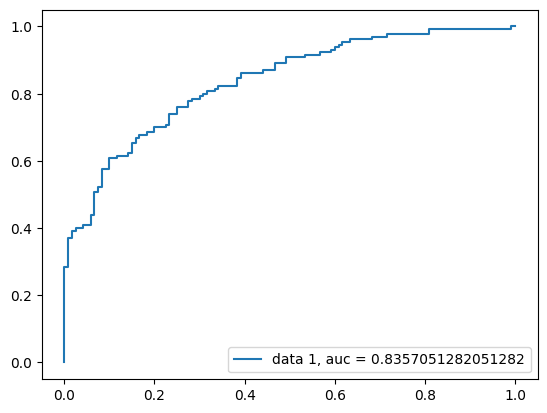

In [ ]:
# Display a ROC chart
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_new_pred_proba = model.predict_log_proba(x_new_test)[::,1]
fpr_new, tpr_new, _ = roc_curve(y_new_test, y_new_pred_proba)
auc_new = roc_auc_score(y_new_test, y_new_pred_proba)
plt.plot(fpr_new, tpr_new, label = f'data 1, auc = {auc_new}')
plt.legend(loc = 4)
plt.show()

**Multi-Classification Using Logical Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
# Print the feature and target values
iris = load_iris()
print(f'Iris features:\n{iris.feature_names}\n')
print(f'Iris targets:\n{iris.target}')

Iris features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Iris targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Create dataframe around iris data
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# Add target data to dataframe
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Set x and y data
x_iris = iris_df.drop('target', axis = 1)
y_iris = iris_df['target']

display(x_iris)
display(y_iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
# Print meta data
print(f'Shape: {iris_df.shape}\n')
print(iris_df.info(), '\n')
print(iris_df.target.value_counts())

Shape: (150, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None 

target
0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
# Split data
from sklearn.model_selection import train_test_split

x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(x_iris, y_iris, test_size = 0.25, random_state = 5)

In [ ]:
# Get multi-class logistical regression (one vs the rest)
from sklearn.linear_model import LogisticRegression

iris_model = LogisticRegression(multi_class = 'ovr')

In [ ]:
# Train model
iris_model.fit(x_iris_train, y_iris_train)
print(f'Score: {iris_model.score(x_iris_train, y_iris_train)}')

y_iris_pred = iris_model.predict(x_iris_test)

Score: 0.9553571428571429


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

iris_c_matrix = confusion_matrix(y_iris_test, y_iris_pred)
iris_c_matrix

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]])

Text(50.722222222222214, 0.5, 'Actual Outcomes')

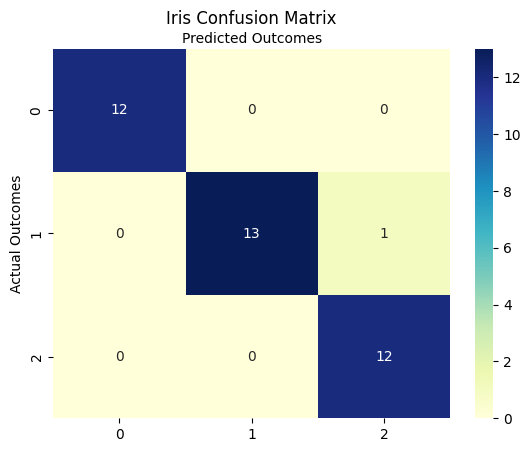

In [ ]:
# Create heatmap
iris_class_names = [0, 1]
iris_axis = plt.subplot()
iris_tick_marks = np.arange(len(iris_class_names))
plt.xticks(iris_tick_marks, iris_class_names)
plt.yticks(iris_tick_marks, iris_class_names)

sns.heatmap(pd.DataFrame(iris_c_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
iris_axis.xaxis.set_label_position('top')
plt.title('Iris Confusion Matrix')
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')

In [ ]:
# Create classification report
from sklearn.metrics import classification_report
iris_target_names = ['0', '1', '2']
print(classification_report(y_iris_test, y_iris_pred, target_names = iris_target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



**KNN And Logistic Regression**

In [ ]:
# Load dataset into a dataframe
import pandas as pd

t_data = pd.read_csv('titanic.csv')
t_data.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0


In [ ]:
# Print some important metrics about the data
print(f'Shape: {t_data.shape}\n')
print(t_data.info())
# Age column shows discrepancies in non-null count

Shape: (891, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB
None


In [ ]:
# Further investigate null values
print(t_data.isnull().sum(), '\n')
# Age has 177 records with null values

# Show the rows with null age values
display(t_data[t_data['Age'].isnull()])

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Survived         0
dtype: int64 



,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Survived
5,6,3,"Moran, Mr. James",male,NaN,330877,8.4583,0
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,244373,13.0000,1
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,2649,7.2250,1
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,2631,7.2250,0
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,330959,7.8792,1
...,...,...,...,...,...,...,...,...
859,860,3,"Razi, Mr. Raihed",male,NaN,2629,7.2292,0
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,CA. 2343,69.5500,0
868,869,3,"van Melkebeke, Mr. Philemon",male,NaN,345777,9.5000,0
878,879,3,"Laleff, Mr. Kristo",male,NaN,349217,7.8958,0


In [ ]:
# Upon further research, it would appear there are two possibilities:
# - Remove the rows
# - Populate the null age values with the mean age for male and female

# Calulcate the mean age for each sex
gender_mean_age = t_data.groupby('Sex')['Age'].mean()
print(gender_mean_age)

# Mean ages rounded to zero decimal place
female_mean_age = gender_mean_age['female'].round(0)
male_mean_age = gender_mean_age['male'].round(0)

print(female_mean_age, male_mean_age)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
28.0 31.0


In [ ]:
# Replace null values using the pandas loc method.
# loc structure for understanding: dataframe.loc[(expression) and (expression), column location] = new data
t_data.loc[(t_data['Age'].isnull()) & (t_data['Sex'] == 'male'), 'Age'] = male_mean_age
t_data.loc[(t_data['Age'].isnull()) & (t_data['Sex'] == 'female'), 'Age'] = female_mean_age

# Check for null values
print(t_data.isnull().sum(), '\n')
# Success!

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Survived       0
dtype: int64 



In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split

# Drop target data and extract features
# Passenger id, name, and ticket contain info that is hard to convert to numbers
# and they most likley do not contribute to target values
x_t_data = t_data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
# Include only target data
y_t_data = t_data['Survived']

x_t_data_train, x_t_data_test, y_t_data_train, y_t_data_test = train_test_split(x_t_data, y_t_data, test_size = 0.25, random_state = 3)

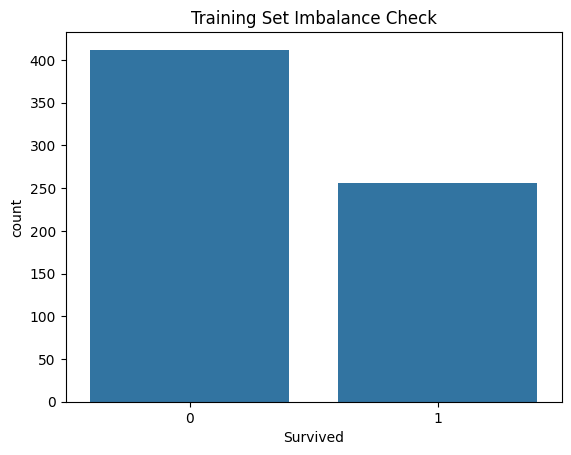

In [ ]:
# Check for imbalances on training data
# I learned that oversampling should only be done on the training set to prevent data leakage
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = y_t_data_train)
plt.title('Training Set Imbalance Check')
plt.show()
# There is a clear imbalance in the dataset

In [ ]:
# Oversample training data
# from imblearn.over_sampling import SMOTE

# Import note: error was thrown because sex is not numerical
# x_t_data_train, y_t_data_train = SMOTE().fit_resample(x_t_data_train, y_t_data_train)

In [ ]:
# Map male to 0 and female to 1 as type integer in training data set
x_t_data_train['Sex'] = x_t_data_train['Sex'].replace({'male' : 0, 'female' : 1}).astype(int)

x_t_data_train.head(10)

/tmp/ipython-input-2476386170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_t_data_train['Sex'] = x_t_data_train['Sex'].replace({'male' : 0, 'female' : 1}).astype(int)


,Pclass,Sex,Age,Fare
3,1,1,35.0,53.1000
354,3,0,31.0,7.2250
698,1,0,49.0,110.8833
360,3,0,40.0,27.9000
509,3,0,26.0,56.4958
5,3,0,31.0,8.4583
739,3,0,31.0,7.8958
209,1,0,40.0,31.0000
593,3,1,28.0,7.7500
339,1,0,45.0,35.5000


In [ ]:
# Oversample training data
from imblearn.over_sampling import SMOTE

# Retry
x_t_data_train, y_t_data_train = SMOTE().fit_resample(x_t_data_train, y_t_data_train)

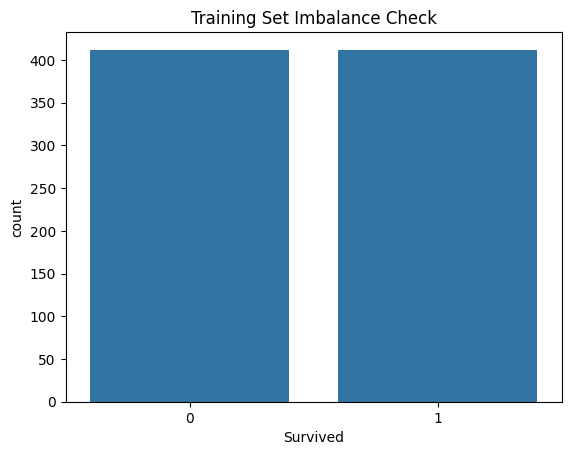

In [ ]:
# Check for imbalances on training data
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = y_t_data_train)
plt.title('Training Set Imbalance Check')
plt.show()
# Success!

In [ ]:
# Logistical regression model and training
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 3)

lr_model.fit(x_t_data_train, y_t_data_train)

LogisticRegression(random_state=3)

In [ ]:
# Map male to 0 and female to 1 as type integer in testing data set
x_t_data_test['Sex'] = x_t_data_test['Sex'].replace({'male' : 0, 'female' : 1}).astype(int)

display(x_t_data_test.head())

# Create prediction set from test data
y_t_data_pred = lr_model.predict(x_t_data_test)

/tmp/ipython-input-807447370.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_t_data_test['Sex'] = x_t_data_test['Sex'].replace({'male' : 0, 'female' : 1}).astype(int)


,Pclass,Sex,Age,Fare
395,3,0,22.0,7.7958
85,3,1,33.0,15.8500
201,3,0,31.0,69.5500
542,3,1,11.0,31.2750
702,3,1,18.0,14.4542


In [ ]:
# Print actual target count for test dataset
print(y_t_data_test.value_counts())

Survived
0    137
1     86
Name: count, dtype: int64


In [ ]:
# Create confusion matrix from actual test data and predicted data
from sklearn.metrics import confusion_matrix

t_data_conf_matrix = confusion_matrix(y_t_data_test, y_t_data_pred)

print(t_data_conf_matrix)

[[96 41]
 [15 71]]


Text(50.722222222222214, 0.5, 'Actual Survival')

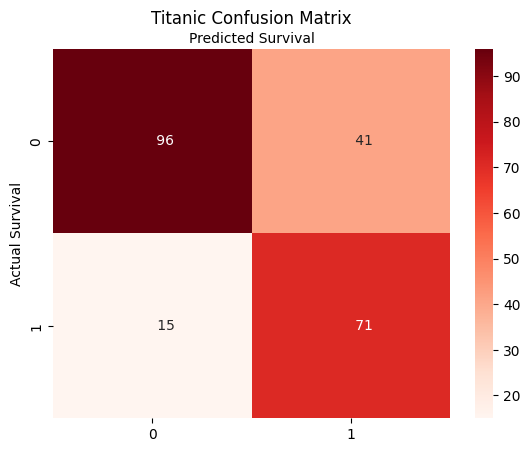

In [ ]:
# Create heatmap of confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

t_data_class_names = [0, 1]
t_data_axis = plt.subplot()
t_data_tick_marks = np.arange(len(t_data_class_names))
plt.xticks(t_data_tick_marks, t_data_class_names)
plt.yticks(t_data_tick_marks, t_data_class_names)

sns.heatmap(pd.DataFrame(t_data_conf_matrix), annot = True, cmap = 'Reds', fmt = '8')
t_data_axis.xaxis.set_label_position('top')
plt.title('Titanic Confusion Matrix')
plt.xlabel('Predicted Survival')
plt.ylabel('Actual Survival')

In [ ]:
# Get the accuracy, precision, and recall metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f'Accuracy score is {accuracy_score(y_t_data_test, y_t_data_pred)}')
print(f'Precision score is {precision_score(y_t_data_test, y_t_data_pred)}')
print(f'Recall score is {recall_score(y_t_data_test, y_t_data_pred)}')

Accuracy score is 0.7488789237668162
Precision score is 0.6339285714285714
Recall score is 0.8255813953488372


In [ ]:
# Display classification report
from sklearn.metrics import classification_report

print(classification_report(y_t_data_test, y_t_data_pred, target_names = ['Did Not Survive', 'Did Survive']))

                 precision    recall  f1-score   support

Did Not Survive       0.86      0.70      0.77       137
    Did Survive       0.63      0.83      0.72        86

       accuracy                           0.75       223
      macro avg       0.75      0.76      0.75       223
   weighted avg       0.78      0.75      0.75       223



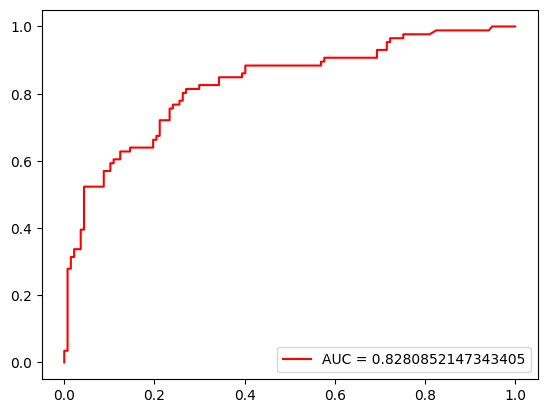

In [ ]:
# Display a ROC chart
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_t_data_proba = lr_model.predict_proba(x_t_data_test)[:, 1]
lr_fpr, lr_tpr, lr_ = roc_curve(y_t_data_test, y_t_data_proba)
lr_auc = roc_auc_score(y_t_data_test, y_t_data_proba)
plt.plot(lr_fpr, lr_tpr, label = f'AUC = {lr_auc}', color = 'red')
plt.legend(loc = 4)
plt.show()

In [ ]:
# Convert sex to int values before dataset split for knn model
x_t_data['Sex'] = x_t_data['Sex'].replace({'male' : 0, 'female' : 1}).astype(int)

x_t_data.head(10)

/tmp/ipython-input-4210400742.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_t_data['Sex'] = x_t_data['Sex'].replace({'male' : 0, 'female' : 1}).astype(int)


,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
5,3,0,31.0,8.4583
6,1,0,54.0,51.8625
7,3,0,2.0,21.0750
8,3,1,27.0,11.1333
9,2,1,14.0,30.0708


In [ ]:
# Create new training and test data sets for knn model
from sklearn.model_selection import train_test_split

x_knn_train, x_knn_test, y_knn_train, y_knn_test = train_test_split(x_t_data, y_t_data, test_size = 0.25, random_state = 7)

In [ ]:
# Address imbalance on training set again
from imblearn.over_sampling import SMOTE

x_knn_train, y_knn_train = SMOTE().fit_resample(x_knn_train, y_knn_train)

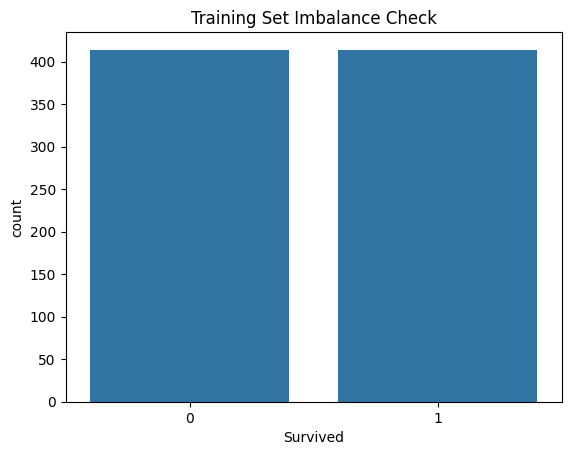

In [ ]:
# Check for imbalances on training data
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = y_knn_train)
plt.title('Training Set Imbalance Check')
plt.show()

In [ ]:
# KNN model with 3 neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(x_knn_train, y_knn_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Create prediction set
y_knn_pred = knn_model.predict(x_knn_test)

In [ ]:
# Print actual target count for test dataset
print(y_knn_test.value_counts())

Survived
0    135
1     88
Name: count, dtype: int64


In [ ]:
# create confusion matrix from actual test data and predicted data
from sklearn.metrics import confusion_matrix

knn_conf_matrix = confusion_matrix(y_knn_test, y_knn_pred)

print(knn_conf_matrix)

[[113  22]
 [ 43  45]]


Text(50.722222222222214, 0.5, 'Actual Survival')

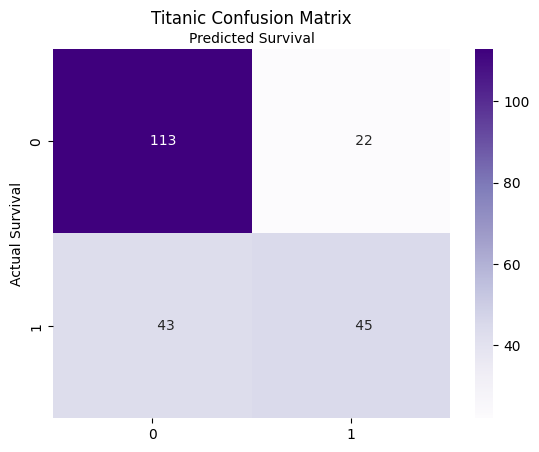

In [ ]:
# Create heatmap of confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

knn_class_names = [0, 1]
knn_axis = plt.subplot()
knn_tick_marks = np.arange(len(knn_class_names))
plt.xticks(knn_tick_marks, knn_class_names)
plt.yticks(knn_tick_marks, knn_class_names)

sns.heatmap(pd.DataFrame(knn_conf_matrix), annot = True, cmap = 'Purples', fmt = '8')
knn_axis.xaxis.set_label_position('top')
plt.title('Titanic Confusion Matrix')
plt.xlabel('Predicted Survival')
plt.ylabel('Actual Survival')

In [ ]:
# Get the accuracy, precision, and recall metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f'Accuracy score is {accuracy_score(y_knn_test, y_knn_pred)}')
print(f'Precision score is {precision_score(y_knn_test, y_knn_pred)}')
print(f'Recall score is {recall_score(y_knn_test, y_knn_pred)}')

Accuracy score is 0.7085201793721974
Precision score is 0.6716417910447762
Recall score is 0.5113636363636364


In [ ]:
# Display classification report
from sklearn.metrics import classification_report

print(classification_report(y_knn_test, y_knn_pred, target_names = ['Did Not Survive', 'Did Survive']))

                 precision    recall  f1-score   support

Did Not Survive       0.72      0.84      0.78       135
    Did Survive       0.67      0.51      0.58        88

       accuracy                           0.71       223
      macro avg       0.70      0.67      0.68       223
   weighted avg       0.70      0.71      0.70       223



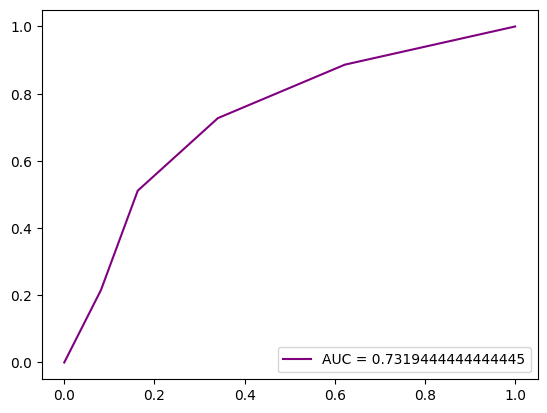

In [ ]:
# Display a ROC chart
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_knn_proba = knn_model.predict_proba(x_knn_test)[:, 1]
knn_fpr, knn_tpr, knn_ = roc_curve(y_knn_test, y_knn_proba)
knn_auc = roc_auc_score(y_knn_test, y_knn_proba)
plt.plot(knn_fpr, knn_tpr, label = f'AUC = {knn_auc}', color = 'purple')
plt.legend(loc = 4)
plt.show()

In [ ]:
# Comparisons between both models
print(f'Logistical Regression:\n{t_data_conf_matrix}\n')
print(f'KNN Model:\n{knn_conf_matrix}')

Logistical Regression:
[[96 41]
 [15 71]]

KNN Model:
[[113  22]
 [ 43  45]]


In [ ]:
# Display classification report for logistical regression model
from sklearn.metrics import classification_report

print('Logistical Regression:')
print(classification_report(y_t_data_test, y_t_data_pred, target_names = ['Did Not Survive', 'Did Survive']))

# Display classification report for KNN model
print('\nKNN:')
print(classification_report(y_knn_test, y_knn_pred, target_names = ['Did Not Survive', 'Did Survive']))

Logistical Regression:
                 precision    recall  f1-score   support

Did Not Survive       0.86      0.70      0.77       137
    Did Survive       0.63      0.83      0.72        86

       accuracy                           0.75       223
      macro avg       0.75      0.76      0.75       223
   weighted avg       0.78      0.75      0.75       223


KNN:
                 precision    recall  f1-score   support

Did Not Survive       0.72      0.84      0.78       135
    Did Survive       0.67      0.51      0.58        88

       accuracy                           0.71       223
      macro avg       0.70      0.67      0.68       223
   weighted avg       0.70      0.71      0.70       223



**Reflection**

For this week, I learned how to apply binary and multi-classification logistical regression and KNN.

During the process of completeing the various tasks, I learned a few key points: how to address imbalanced data using oversampling (in the last exercise, I learned to only apply this technique to the training data to prevent bias in the model); how to identitfy and address null values using the mean value; and how to convert string data into numerical data so the various algorithms understand how to interpt the data.

In this section, I will compare the results of the logistical regression (LR) model and the KNN model. The classification reports show the LR model was better at correctly identifying when survivors actually survived (recall score: 0.83), whereas the KNN model was no better than random guessing (recall score: 0.51). Addtionally, the LR model had superior average accuracys across the board, clearly demonstrating that it is the better model.